## What is Clustering?
Cluster analysis groups data objects based only on information found in the data that describes the objects and their relationships. The goal is that the objects within a group be similar (or related) to one another and different from (or unrelated to) the objects in other groups. The greater the similarity (or homogeneity) within a group and greater the difference between groups, the better or more distinct the clustering[1]

**Types of Clustering**

**Partitional Clustering**
- A division of data objects into non-overlapping subsets (clusters) such that each data object is in exactly one subset.
- KMeans, DBSCAN.

**Hierarchical clustering**
- A set of nested clusters organized as a hierarchical tree.
- Can be visualized as a dendrogram (A tree like diagram that records the sequences of merges or splits).
- Agglomerative, Divisive.

In [24]:
import pandas as pd
import numpy as np

import pandas as pd
from pandas import Series, DataFrame

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn import metrics

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', context='notebook')
#sns.reset_defaults()
#sns.reset_orig()

## 1. Partitional Clustering

### 1.1 Evaluation of $k$-Means over Diverse Datasets

Explore how $k$-Means perform on datasets with diverse structure. Also explore different ways of customizing $k$-Means and learn about how to find good initialization and good value of $k$.

In [37]:
import sklearn.datasets as datasets
# Create a blob dataset with 300 2-D points with 5 clusters with a standard deviation of 1.0
data, true_cluster_labels = datasets.make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=1.0, random_state=123)

# Invoke Kmeans with 5 clusters, with k-means++ initialization heuristic and random state of 123
kmeanspp = KMeans(n_clusters=5, init="k-means++", random_state=123)
kmeanspp_cluster_labels = kmeanspp.fit(data).labels_

# Invoke Kmeans with 5 clusters, with random initialization heuristic and random state of 123
kmeans_random = KMeans(n_clusters=5, init="random", random_state=123)
kmeans_random_cluster_labels = kmeans_random.fit(data).labels_

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


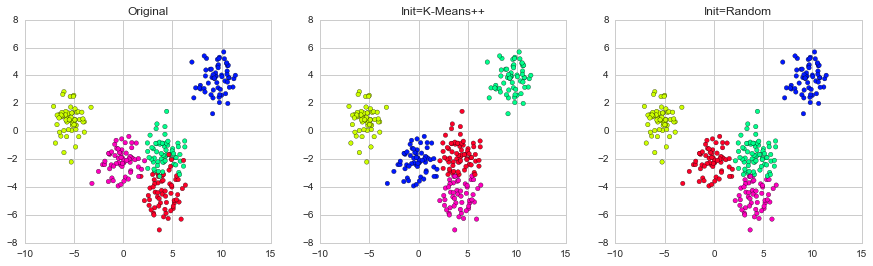

In [38]:
plt.set_cmap('gist_rainbow')
plt.figure()
f, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].scatter(data[:,0], data[:,1], c=true_cluster_labels)
ax[0].set_title('Original')

ax[1].scatter(data[:,0], data[:,1], c=kmeanspp_cluster_labels)
ax[1].set_title('Init=K-Means++')

ax[2].scatter(data[:,0], data[:,1], c=kmeans_random_cluster_labels)
ax[2].set_title('Init=Random')

k-means++ initialization scheme, initializes the centroids to be (generally) distant from each other. random initialization scheme chooses k observations (rows) at random from data for the initial centroids. k-means++ leads to provably better results than random initialization, as shown in the reference.

**Performance Evaluation**  
Both K-Means++ and Random initialization seems to performs pretty well but since we already know the cluster labels we will confirm the performance by plotting the Homogeneity Scores and Completenes Scores for different values of k.

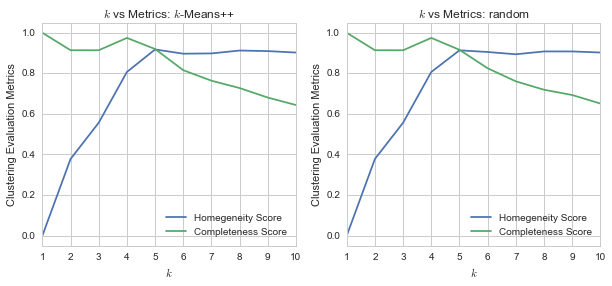

In [47]:
k_min, k_max = 1, 10
k_range = range(k_min, k_max+1)

adjusted_homogeneity_scores[0] = [0 for _ in range(k_min, k_max+1)]
adjusted_homogeneity_scores[1] = [0 for _ in range(k_min, k_max+1)]
adjusted_completeness_scores[0] = [0 for _ in range(k_min, k_max+1)]
adjusted_completeness_scores[1] = [0 for _ in range(k_min, k_max+1)]

for k in k_range:
    kmeanspp = KMeans(n_clusters=k, init="k-means++", random_state=123)
    kmeanspp_cluster_labels = kmeanspp.fit(data).labels_
    
    kmeans_random = KMeans(n_clusters=k, init="random", random_state=123)
    kmeans_random_cluster_labels = kmeans_random.fit(data).labels_

    # compute the score based on homogeneity score
    adjusted_homogeneity_scores[0][k-1] = metrics.homogeneity_score(true_cluster_labels, kmeanspp_cluster_labels)
    adjusted_homogeneity_scores[1][k-1] = metrics.homogeneity_score(true_cluster_labels, kmeans_random_cluster_labels)
    
    # compute the score based on completeness index
    adjusted_completeness_scores[0][k-1] = metrics.completeness_score(true_cluster_labels, kmeanspp_cluster_labels)
    adjusted_completeness_scores[1][k-1] = metrics.completeness_score(true_cluster_labels, kmeans_random_cluster_labels)

plt.figure()
f, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(k_range, adjusted_homogeneity_scores[0], label='Homegeneity Score')
ax[0].plot(k_range, adjusted_completeness_scores[0], label='Completeness Score')

ax[0].set_title("$k$ vs Metrics: $k$-Means++")
ax[0].set_xlabel("$k$")
ax[0].set_ylabel("Clustering Evaluation Metrics")
ax[0].set_ylim([-0.05, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(k_range, adjusted_homogeneity_scores[1], label='Homegeneity Score')
ax[1].plot(k_range, adjusted_completeness_scores[1], label='Completeness Score')
ax[1].set_title("$k$ vs Metrics: random")
ax[1].set_xlabel("$k$")
ax[1].set_ylabel("Clustering Evaluation Metrics")
ax[1].set_ylim([-0.05, 1.05])
ax[1].legend(loc="lower right")

Clearly, k = 5 gives the best performance which is also the number of clusters we provided while creating the dataset.

In [51]:
# Create a blob dataset with 400 2-D points with 5 clusters with a standard deviation of 4.0
data, true_cluster_labels = datasets.make_blobs(n_samples=400, n_features=2, centers=5, cluster_std=4.0, random_state=123)

# Invoke Kmeans with 5 clusters, with k-means++ initialization heuristic and random state of 123
kmeanspp = KMeans(n_clusters=5, init="k-means++", random_state=1234)
kmeanspp_cluster_labels = kmeanspp.fit(data).labels_

# Invoke Kmeans with 5 clusters, with random initialization heuristic and random state of 123
kmeans_random = KMeans(n_clusters=5, init="random", random_state=1234)
kmeans_random_cluster_labels = kmeans_random.fit(data).labels_

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


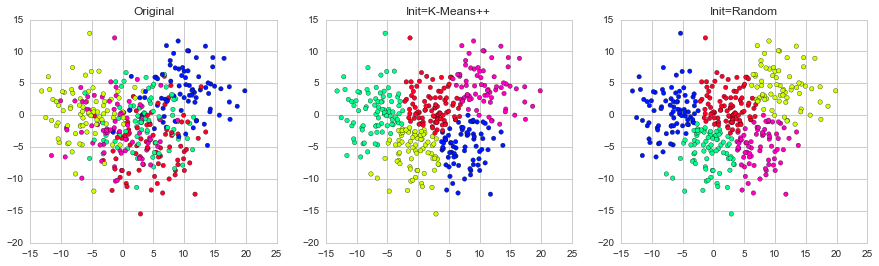

In [52]:
plt.set_cmap('gist_rainbow')
plt.figure()
f, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].scatter(data[:,0], data[:,1], c=true_cluster_labels)
ax[0].set_title('Original')

ax[1].scatter(data[:,0], data[:,1], c=kmeanspp_cluster_labels)
ax[1].set_title('Init=K-Means++')

ax[2].scatter(data[:,0], data[:,1], c=kmeans_random_cluster_labels)
ax[2].set_title('Init=Random')

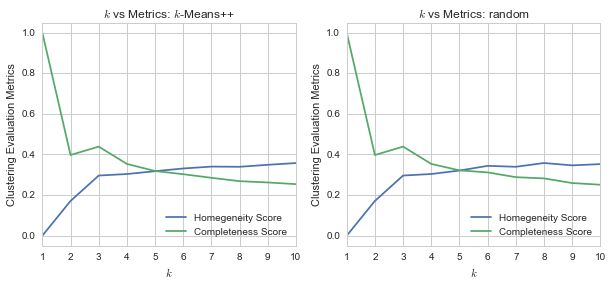

In [53]:
k_min, k_max = 1, 10
k_range = range(k_min, k_max+1)

adjusted_homogeneity_scores[0] = [0 for _ in range(k_min, k_max+1)]
adjusted_homogeneity_scores[1] = [0 for _ in range(k_min, k_max+1)]
adjusted_completeness_scores[0] = [0 for _ in range(k_min, k_max+1)]
adjusted_completeness_scores[1] = [0 for _ in range(k_min, k_max+1)]

for k in k_range:
    kmeanspp = KMeans(n_clusters=k, init="k-means++", random_state=123)
    kmeanspp_cluster_labels = kmeanspp.fit(data).labels_
    
    kmeans_random = KMeans(n_clusters=k, init="random", random_state=123)
    kmeans_random_cluster_labels = kmeans_random.fit(data).labels_

    # compute the score based on homogeneity score
    adjusted_homogeneity_scores[0][k-1] = metrics.homogeneity_score(true_cluster_labels, kmeanspp_cluster_labels)
    adjusted_homogeneity_scores[1][k-1] = metrics.homogeneity_score(true_cluster_labels, kmeans_random_cluster_labels)
    
    # compute the score based on completeness index
    adjusted_completeness_scores[0][k-1] = metrics.completeness_score(true_cluster_labels, kmeanspp_cluster_labels)
    adjusted_completeness_scores[1][k-1] = metrics.completeness_score(true_cluster_labels, kmeans_random_cluster_labels)

plt.figure()
f, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(k_range, adjusted_homogeneity_scores[0], label='Homegeneity Score')
ax[0].plot(k_range, adjusted_completeness_scores[0], label='Completeness Score')

ax[0].set_title("$k$ vs Metrics: $k$-Means++")
ax[0].set_xlabel("$k$")
ax[0].set_ylabel("Clustering Evaluation Metrics")
ax[0].set_ylim([-0.05, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(k_range, adjusted_homogeneity_scores[1], label='Homegeneity Score')
ax[1].plot(k_range, adjusted_completeness_scores[1], label='Completeness Score')
ax[1].set_title("$k$ vs Metrics: random")
ax[1].set_xlabel("$k$")
ax[1].set_ylabel("Clustering Evaluation Metrics")
ax[1].set_ylim([-0.05, 1.05])
ax[1].legend(loc="lower right")

Clearly, k = 5 gives the best performance which is also the number of clusters we provided while creating the dataset. However, it is quite evident that the Homegeneity Score is very low as compared to the above cases because the data were not in well defined cluster boundaries.

In [48]:
# Create two concentric circles dataset with 200 2-D points
data, true_cluster_labels = datasets.make_circles(n_samples=200, noise=0.01, random_state=123)

# Invoke Kmeans with 2 clusters, with k-means++ initialization heuristic and random state of 123
kmeanspp = KMeans(n_clusters=2, init="k-means++", random_state=1234)
kmeanspp_cluster_labels = kmeanspp.fit(data).labels_

# Invoke Kmeans with 2 clusters, with random initialization heuristic and random state of 123
kmeans_random = KMeans(n_clusters=2, init="random", random_state=1234)
kmeans_random_cluster_labels = kmeans_random.fit(data).labels_

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


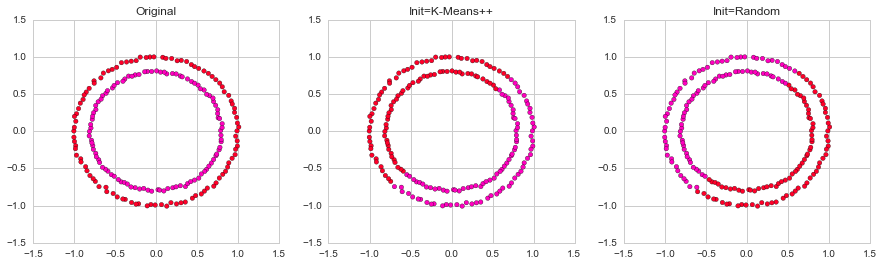

In [49]:
plt.set_cmap('gist_rainbow')
plt.figure()
f, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].scatter(data[:,0], data[:,1], c=true_cluster_labels)
ax[0].set_title('Original')

ax[1].scatter(data[:,0], data[:,1], c=kmeanspp_cluster_labels)
ax[1].set_title('Init=K-Means++')

ax[2].scatter(data[:,0], data[:,1], c=kmeans_random_cluster_labels)
ax[2].set_title('Init=Random')

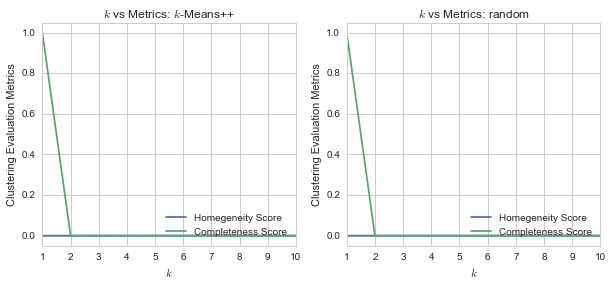

In [50]:
k_min, k_max = 1, 10
k_range = range(k_min, k_max+1)

adjusted_homogeneity_scores[0] = [0 for _ in range(k_min, k_max+1)]
adjusted_homogeneity_scores[1] = [0 for _ in range(k_min, k_max+1)]
adjusted_completeness_scores[0] = [0 for _ in range(k_min, k_max+1)]
adjusted_completeness_scores[1] = [0 for _ in range(k_min, k_max+1)]

for k in k_range:
    kmeanspp = KMeans(n_clusters=k, init="k-means++", random_state=123)
    kmeanspp_cluster_labels = kmeanspp.fit(data).labels_
    
    kmeans_random = KMeans(n_clusters=k, init="random", random_state=123)
    kmeans_random_cluster_labels = kmeans_random.fit(data).labels_

    # compute the score based on homogeneity score
    adjusted_homogeneity_scores[0][k-1] = metrics.homogeneity_score(true_cluster_labels, kmeanspp_cluster_labels)
    adjusted_homogeneity_scores[1][k-1] = metrics.homogeneity_score(true_cluster_labels, kmeans_random_cluster_labels)
    
    # compute the score based on completeness index
    adjusted_completeness_scores[0][k-1] = metrics.completeness_score(true_cluster_labels, kmeanspp_cluster_labels)
    adjusted_completeness_scores[1][k-1] = metrics.completeness_score(true_cluster_labels, kmeans_random_cluster_labels)

plt.figure()
f, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(k_range, adjusted_homogeneity_scores[0], label='Homegeneity Score')
ax[0].plot(k_range, adjusted_completeness_scores[0], label='Completeness Score')

ax[0].set_title("$k$ vs Metrics: $k$-Means++")
ax[0].set_xlabel("$k$")
ax[0].set_ylabel("Clustering Evaluation Metrics")
ax[0].set_ylim([-0.05, 1.05])
ax[0].legend(loc="lower right")

ax[1].plot(k_range, adjusted_homogeneity_scores[1], label='Homegeneity Score')
ax[1].plot(k_range, adjusted_completeness_scores[1], label='Completeness Score')
ax[1].set_title("$k$ vs Metrics: random")
ax[1].set_xlabel("$k$")
ax[1].set_ylabel("Clustering Evaluation Metrics")
ax[1].set_ylim([-0.05, 1.05])
ax[1].legend(loc="lower right")

$k$-means fails miserably here. 

### Issues with $k$-means

This highlights that $k$-means has problems when clusters are of different  
- Sizes
- Densities
- Non-globular shapes

In [20]:
# Create two half-moon dataset with 200 2-D points
data, true_cluster_labels = datasets.make_moons(n_samples=200, noise=0.05, random_state=123)

# Invoke Kmeans with 2 clusters, with k-means++ initialization heuristic and random state of 123
kmeanspp = KMeans(n_clusters=2, init="k-means++", random_state=1234)
kmeanspp_cluster_labels = kmeanspp.fit(data).labels_

# Invoke Kmeans with 2 clusters, with random initialization heuristic and random state of 123
kmeans_random = KMeans(n_clusters=2, init="random", random_state=1234)
kmeans_random_cluster_labels = kmeans_random.fit(data).labels_

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


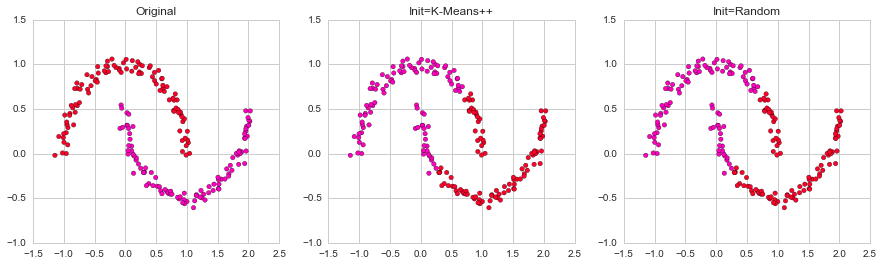

In [23]:
plt.set_cmap('gist_rainbow')
plt.figure()
f, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].scatter(data[:,0], data[:,1], c=true_cluster_labels)
ax[0].set_title('Original')

ax[1].scatter(data[:,0], data[:,1], c=kmeanspp_cluster_labels)
ax[1].set_title('Init=K-Means++')

ax[2].scatter(data[:,0], data[:,1], c=kmeans_random_cluster_labels)
ax[2].set_title('Init=Random')

## Hierarchical Clustering

### How to Define Inter-Cluster Proximity

* MIN or Single Linkage - Proximity of two clusters is based on the two closest points in the different clusters. It is determined by one pair of points, i.e., by one link in the proximity graph.

* MAX of Complete Linkage - Similarity of two clusters is based on the two most distant points in the different clusters. It is determined by all pairs of points in the two clusters.

* Group Average - Proximity of two clusters is the average of pairwise proximity between points in the two clusters.
$proximity(Cluster_{i},Cluster_{j})=\frac{{\displaystyle \sum_{\substack{p_{i}\epsilon Cluster_{i}\\p_{j}\epsilon Cluster_{j}}}proximity(p_{i},p_{j})}}{|Cluster_{i}|\times|Cluster_{j}|}$

* Distance Between Centroids - Similarity of two clusters is based on proximity between centroids of clusters.
* Other methods driven by an objective function
    - Ward’s Method uses squared error - Proximity of two clusters is based on the increase in SSE when two clusters are merged. Similar to group average if distance between points is distance squared. Find the two whose merger will incur least increase.

### Performing hierarchical/agglomerative clustering based on the condensed distance matrix using scipy
http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html  
linkage(y[, method, metric])	Performs hierarchical/agglomerative clustering on the condensed distance matrix y.

In [89]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['P1','P2','P3','P4', 'P5', 'P6', 'P7', 'P8','P9','P10']
X = np.random.random_sample([10,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df = df.drop('Z', axis=1)

D:\Work\Anaconda3\lib\site-packages\matplotlib\text.py:1857: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


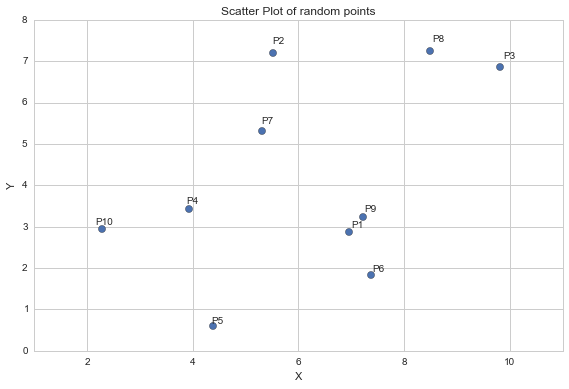

In [94]:
df.plot.scatter(x='X', y='Y', s=50)
plt.title('Scatter Plot of random points')
for i, ind in enumerate(df.index):
    plt.annotate(ind, xy=(df['X'][i], df['Y'][i]),
            textcoords='offset points', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [95]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
    pdist(df, metric='euclidean')),
    columns=labels, index=labels)
row_dist

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,0.000000,4.569949,4.896710,3.096504,3.432137,1.116569,2.959064,4.642397,0.450593,4.682672
P2,4.569949,0.000000,4.308442,4.085813,6.693543,5.685017,1.886793,2.981587,4.318625,5.344432
P3,4.896710,4.308442,0.000000,6.806106,8.275185,5.579249,4.745543,1.371801,4.446123,8.480738
P4,3.096504,4.085813,6.806106,0.000000,2.872810,3.813812,2.345857,5.954064,3.309441,1.711576
P5,3.432137,6.693543,8.275185,2.872810,0.000000,3.236317,4.812177,7.814951,3.871688,3.146471
P6,1.116569,5.685017,5.579249,3.813812,3.236317,0.000000,4.057766,5.533016,1.413255,5.217253
P7,2.959064,1.886793,4.745543,2.345857,4.812177,4.057766,0.000000,3.716899,2.829592,3.855927
P8,4.642397,2.981587,1.371801,5.954064,7.814951,5.533016,3.716899,0.000000,4.211003,7.559024
P9,0.450593,4.318625,4.446123,3.309441,3.871688,1.413255,2.829592,4.211003,0.000000,4.950447
P10,4.682672,5.344432,8.480738,1.711576,3.146471,5.217253,3.855927,7.559024,4.950447,0.000000


Using the preceding code, we calculated the Euclidean distance between each pair of sample points in our dataset based on the features X, Y, and Z. We provided the condensed distance matrix—returned by pdist—as input to the squareform function to create a symmetrical matrix of the pair-wise distances.

## Evalutation of Agglomerative Clustering using the linkage matrix and visualizing by a Dendrogram

We now apply the complete linkage agglomeration to our clusters using the linkage function from SciPy's cluster.hierarchy submodule, which returns a so-called linkage matrix. The linkage method takes a condensed or redundant distance matrix as input. A condensed distance matrix is a flat array containing the upper triangular of the distance matrix. This is the form that pdist returns. Alternatively, a collection of m observation vectors in n dimensions may be passed as an m by n array.

Based on the function description, we conclude that we can use a condensed distance matrix (upper triangular) from the pdist function as an input attribute. Alternatively, we could also provide the initial data array and use the euclidean metric as a function argument in linkage. However, we should not use the squareform distance matrix that we calculated above, since it would yield different distance values from those expected.

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


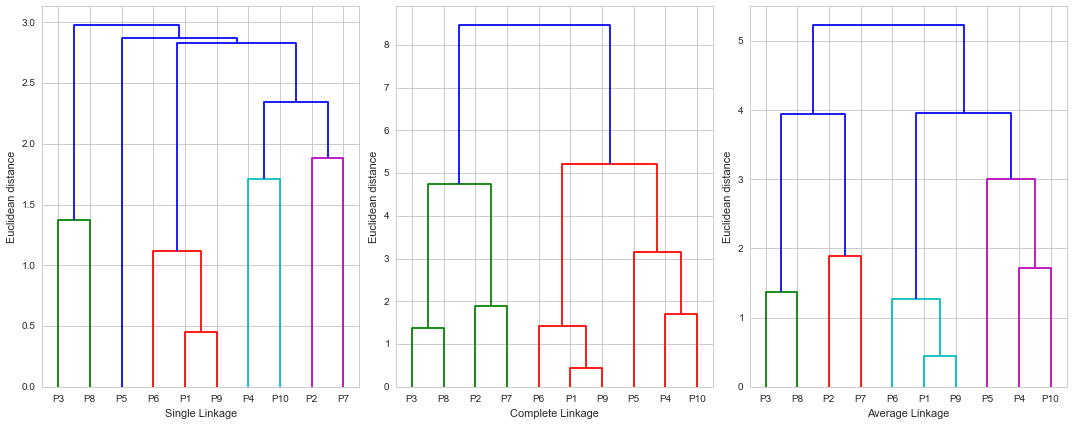

In [96]:
# Plot different dendograms in the same figure
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

fig = plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
row_clusters = linkage(pdist(df, metric='euclidean'), method='single')
dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xlabel('Single Linkage')

plt.subplot(1,3,2)
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xlabel('Complete Linkage')

plt.subplot(1,3,3)
row_clusters = linkage(pdist(df, metric='euclidean'), method='average')
dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xlabel('Average Linkage')

### Applying agglomerative clustering via scikit-learn

In [58]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0 0 1 1 0 0]


Looking at the predicted cluster labels, we can see that the samples ID_1, ID_4, ID_5, ID_6, ID_9 and ID_10 were assigned to one cluster (0), and the samples ID_2, ID_3, ID_7 and ID_8 were assigned to a second cluster (1), which is consistent with the results that we can observe in the dendrogram.

Cutting a Dendogram horizontally will give us the number of clusters. If we make a cut at 5 in the complete Linkage graph it will give us 3 clusters whereas making a cut at 4 will give us 4 clusters.

In [59]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1 1 0 0 1 2]


If we make a cut at 5 then we will get 3 clusters. This is also validated by setting the parameter n_clusters = 3. Looking at the predicted cluster labels, we can see that the samples ID_2, ID_3, ID_7 and ID_8 were assigned to one cluster (0). Samples ID_1, ID_5, ID_6 and ID_9 were assigned to one cluster (1), and the samples ID_4 and ID_10 were assigned to a third cluster (2), which is consistent with the results that we can observe in the dendrogram.

### Locating regions of high density via DBSCAN
Density-based Spatial Clustering of Applications with Noise (DBSCAN).

The notion of density
in DBSCAN is defined as the number of points within a specified radius $\varepsilon$
In DBSCAN, a special label is assigned to each sample (point) using the
following criteria:
- A point is considered as **core point** if at least a specified number (MinPts) of neighboring points fall within the specified radius $\varepsilon$
- A **border point** is a point that has fewer neighbors than MinPts within $\varepsilon$, but lies within the $\varepsilon$ radius of a core point
- All other points that are neither core nor border points are considered as **noise points**

After labeling the points as core, border, or noise points, the DBSCAN algorithm can be summarized in two simple steps:
1. Form a separate cluster for each core point or a connected group of core points (core points are connected if they are no farther away than $\varepsilon$).
2. Assign each border point to the cluster of its corresponding core point.

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points.

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


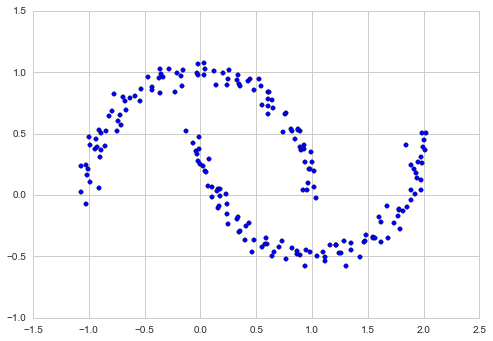

In [78]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

As we can see in the resulting plot, there are two visible, half-moon-shaped groups consisting of 100 sample points each. We will use the k-means algorithm and complete linkage clustering to see whether one of those previously discussed clustering algorithms can successfully identify the half-moon shapes as separate clusters.

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


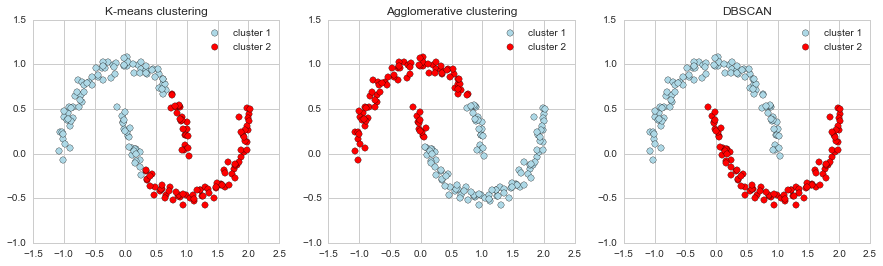

In [79]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], c='red', marker='o', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ax1.legend(loc="best")

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', marker='o', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.legend(loc="best")

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
ax3.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax3.scatter(X[y_db==1,0], X[y_db==1,1], c='red', marker='o', s=40, label='cluster 2')
ax3.set_title('DBSCAN')
ax3.legend(loc="best")

The DBSCAN algorithm can successfully detect the half-moon shapes, which highlights one of the strengths of DBSCAN (clustering data of arbitrary shapes).

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


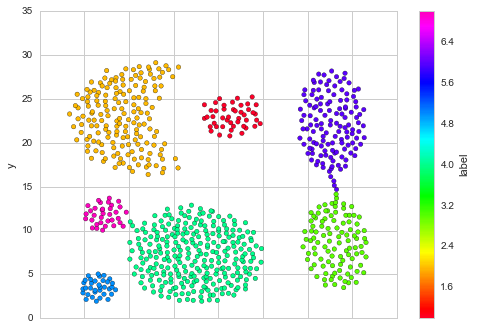

In [18]:
df = pd.read_table('shapes/Aggregation.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


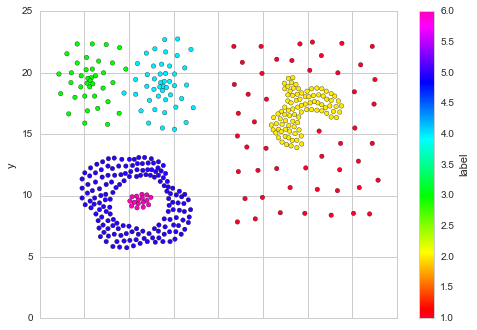

In [19]:
df = pd.read_table('shapes/Compound.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#cm = plt.cm.get_cmap('spectral')  # or your colormap of choice
#cm = plt.cm.get_cmap('gnuplot')
#cm = plt.cm.get_cmap('gist_rainbow')
#cm = plt.cm.get_cmap('rainbow')
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');
#df.plot.scatter(x='x', y='y');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


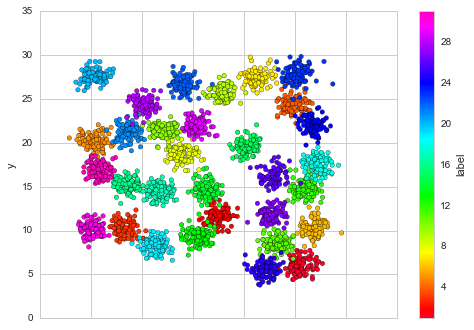

In [20]:
df = pd.read_table('shapes/D31.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


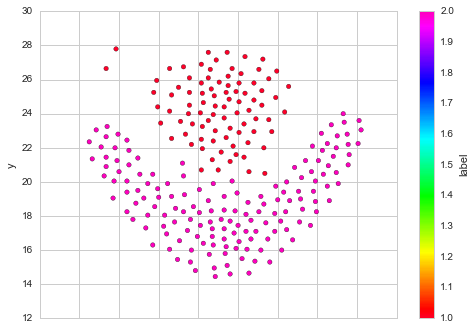

In [21]:
df = pd.read_table('shapes/flame.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


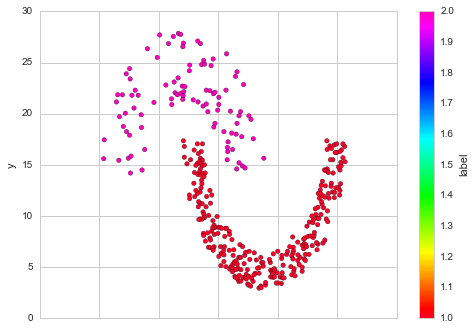

In [22]:
df = pd.read_table('shapes/jain.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


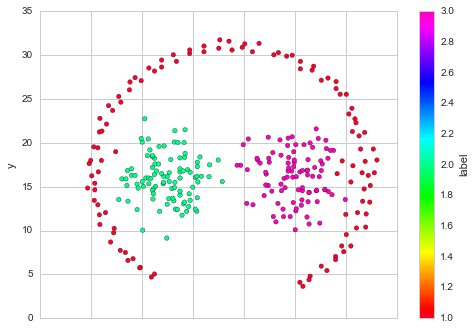

In [23]:
df = pd.read_table('shapes/pathbased.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


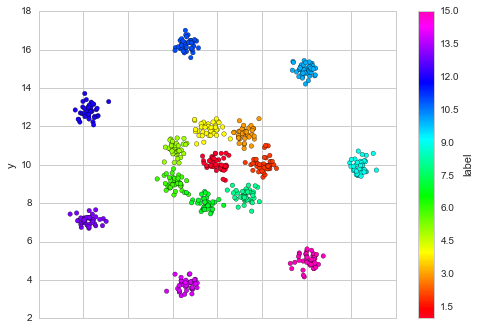

In [24]:
df = pd.read_table('shapes/R15.txt', sep='\t', header=None, names=['x', 'y', 'label'])
#df = df.drop('label', axis=1)
#df.plot(kind='scatter', x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


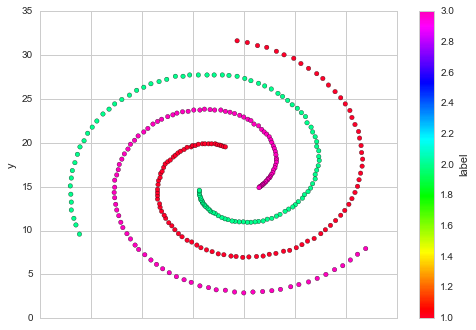

In [25]:
df = pd.read_table('shapes/spiral.txt', sep='\t', header=None, names=['x', 'y', 'label'])
##df = df.drop('label', axis=1)
#df.plot.scatter(x='x', y='y');
df.plot.scatter(x='x', y='y', c='label', cmap='gist_rainbow');

In [26]:
db = DBSCAN(eps=0.1, min_samples=3, metric='euclidean')
y_db = db.fit_predict(df)
print(np.unique(y_db))

[-1]
